# **Training Model Using Own CNN Architecture**

In [1]:
# !python --version

# Python 3.7.13

In [2]:
# Import all necessary libraries
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [3]:
# print("Tensor flow version: ", tensorflow.__version__)
# print("Keras flow version: ", keras.__version__)
# print("Matplotlib flow version: ", matplotlib.__version__)
# print("Seaborn flow version: ", sns.__version__)
# print("Numpy flow version: ", np.__version__)

# Tensor flow version:  2.8.0
# Keras flow version:  2.8.0
# Matplotlib flow version:  3.2.2
# Seaborn flow version:  0.11.2
# Numpy flow version:  1.21.5

In [4]:
train_data_path = "/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/dataset/train"

validation_data_path = "/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/dataset/valid"

# **Make a Function for showing augmented Images**

In [5]:
def plotImages(image_arr):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
    axes = axes.flatten()
    for image, ax in zip(image_arr, axes):
        ax.imshow(image)
    plt.tight_layout()
    plt.show()

### **Make ImageDataGenerator class boject with hyperparameters**

# **Demo: 1**

In [6]:
# This is the Augmentation Configuration we will use for traning Images
# It will Generate more image using Below Parameters

training_datagen = ImageDataGenerator(rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      rescale=1./255,
                                      fill_mode='nearest')

In [7]:
# This is a generator that will read pictures found in 
# at train_data_path, and indefinitely generate batches of augmented image data

training_data = training_datagen.flow_from_directory(directory=train_data_path, # this is the target directory
                                                     target_size=(200, 200), # all images will be resize to 200 x 200
                                                     class_mode='binary', # since we use binary_crossentropy loss, we need binary labels
                                                     batch_size=32) # Pick 32 image at a time

Found 3899 images belonging to 2 classes.


In [8]:
# show the class labels

training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
print(training_data)

In [9]:
# this is the Augmentation configuration we will use for validation: only apply rescaling

validation_datagen = ImageDataGenerator(rescale=1./255)

# This is a similar generator, for validation data
validation_data = validation_datagen.flow_from_directory(directory=validation_data_path,# this is the target directory
                                                     target_size=(200, 200),# all images will be resized to 200 x 200
                                                     batch_size=32, # Pick 32 img at a time
                                                     class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

Found 806 images belonging to 2 classes.


In [10]:
# show the class labels

validation_data.class_indices

{'with_mask': 0, 'without_mask': 1}

# **Demo: 2**

In [11]:
# training_datagen2 = ImageDataGenerator(featurewise_center=True, 
#                                        samplewise_center=False, 
#                                        featurewise_std_normalization=True, 
#                                        samplewise_std_normalization=False, 
#                                        zca_whitening=False, 
#                                        zca_epsilon=1e-06, 
#                                        rotation_range=30, 
#                                        width_shift_range=0.2, 
#                                        height_shift_range=0.2, 
#                                        brightness_range=None, 
#                                        shear_range=0.2, 
#                                        zoom_range=0.2,
#                                        channel_shift_range=0.0,
#                                        fill_mode='nearest',
#                                        cval=0.0, 
#                                        horizontal_flip=True, 
#                                        vertical_flip=False, 
#                                        rescale=None, 
#                                        preprocessing_function=None, 
#                                        data_format=None, 
#                                        validation_split=0.0, 
#                                        dtype=None)

In [12]:
# training_data2 = training_datagen2.flow_from_directory(directory=train_data_path, # this is the target directory
#                                                      target_size=(200, 200), # all images will be resize to 200 x 200
#                                                      class_mode='binary', # since we use binary_crossentropy loss, we need binary labels
#                                                      batch_size=64) # Pick 64 image at a time

In [13]:
# training_data2.class_indices

In [14]:
# validation_datagen2 = ImageDataGenerator(rescale=1./255)

# # This is a similar generator, for validation data
# validation_data2 = validation_datagen2.flow_from_directory(directory=validation_data_path,# this is the target directory
#                                                      target_size=(200, 200),# all images will be resized to 200 x 200
#                                                      batch_size=64, # Pick 64 img at a time
#                                                      class_mode="binary")# since we use binary_crossentropy loss, we need binary labels

In [15]:
# validation_data2.class_indices

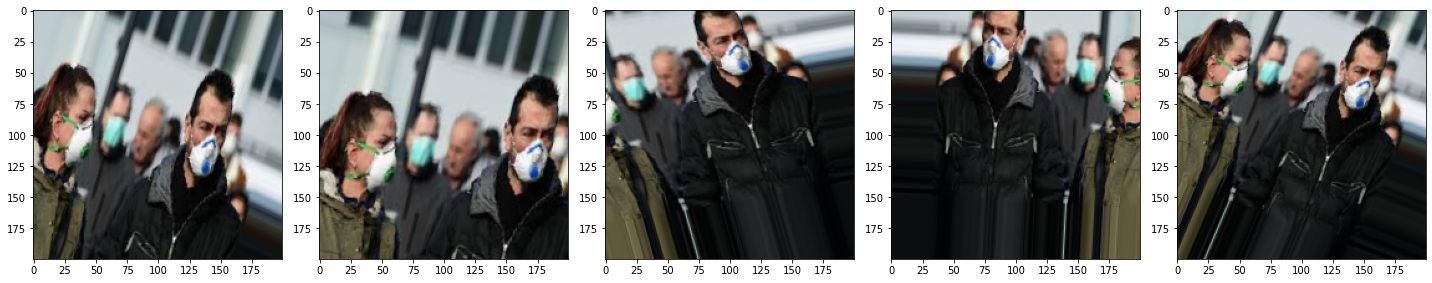

In [16]:
# Showing Augmented Images

# For Demo: 1
images = [training_data[0][0][0] for i in range(5)]

plotImages(images)

In [17]:
print(images)

[array([[[0.74509805, 0.8000001 , 0.80392164],
        [0.74509805, 0.8000001 , 0.80392164],
        [0.74509805, 0.8000001 , 0.80392164],
        ...,
        [0.16185096, 0.22067448, 0.23243919],
        [0.17281301, 0.23163654, 0.24340124],
        [0.17842871, 0.24116845, 0.26272368]],

       [[0.74509805, 0.8000001 , 0.80392164],
        [0.74509805, 0.8000001 , 0.80392164],
        [0.74509805, 0.8000001 , 0.80392164],
        ...,
        [0.16665259, 0.22547612, 0.23724082],
        [0.17521381, 0.23403734, 0.24580206],
        [0.1796291 , 0.24476966, 0.27232692]],

       [[0.74509805, 0.8000001 , 0.80392164],
        [0.74509805, 0.8000001 , 0.80392164],
        [0.74509805, 0.8000001 , 0.80392164],
        ...,
        [0.17004083, 0.22886436, 0.24062906],
        [0.1770426 , 0.23701018, 0.25163496],
        [0.18214156, 0.24880823, 0.28018075]],

       ...,

       [[0.36056307, 0.33703366, 0.242916  ],
        [0.37479115, 0.35126173, 0.26185873],
        [0.3783824 , 

In [18]:
print(training_data[0][0][0])

[[[0.8132034  0.8518235  0.84790194]
  [0.8026136  0.8418293  0.83790773]
  [0.8000001  0.83921576 0.83910125]
  ...
  [0.55930287 0.5970885  0.6067155 ]
  [0.5739869  0.60535944 0.61712414]
  [0.56660765 0.5979802  0.6097449 ]]

 [[0.823842   0.86128    0.85735846]
  [0.8049778  0.84419346 0.8402719 ]
  [0.8000001  0.83921576 0.83673716]
  ...
  [0.5918155  0.623188   0.6349527 ]
  [0.5810793  0.61245185 0.62421656]
  [0.57452947 0.605902   0.6176667 ]]

 [[0.8344806  0.87073654 0.866815  ]
  [0.80734193 0.8465576  0.84263605]
  [0.8009212  0.8401369  0.8362153 ]
  ...
  [0.5940543  0.6254268  0.63719153]
  [0.60866743 0.64004    0.6518047 ]
  [0.6063113  0.63768387 0.6494486 ]]

 ...

 [[0.04313726 0.05882353 0.05490196]
  [0.04313726 0.05882353 0.05490196]
  [0.04313726 0.05882353 0.05490196]
  ...
  [0.12730646 0.1351496  0.13122803]
  [0.10845422 0.11629736 0.11237579]
  [0.1062054  0.11404853 0.11012696]]

 [[0.04313726 0.05882353 0.05490196]
  [0.03566902 0.04999743 0.04539694]


## **Save the Best Model Using val_accuracy**

In [26]:
model_path = "/content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/Own custom model/model.h5"

checkpoint = ModelCheckpoint(filepath=model_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

callbacks_list = [checkpoint]

# **Building CNN Model**

In [27]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    # Apply Dropout to reduce overfit model
                                    keras.layers.Dropout(0.5),
                                    # Add Flatten layer for make 1-D array so that Dense layer can take as a input                                                                       
                                    keras.layers.Flatten(), # neural network beuilding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    # Add first Hidden layer                                   
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [29]:
# Compile the Model

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

In [32]:
# Train The CNN model and Fit the model

history = cnn_model.fit(x=training_data,
                        batch_size=64,
                        epochs=70,
                        verbose=1, 
                        validation_data=validation_data,
                        callbacks=callbacks_list)

Epoch 1/70
 43/122 [=========>....................] - ETA: 42s - loss: 0.3852 - accuracy: 0.8488

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


122/122 [==============================] - ETA: 0s - loss: 0.3408 - accuracy: 0.8725
Epoch 1: val_accuracy improved from -inf to 0.90943, saving model to /content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/Own custom model/model.h5
122/122 [==============================] - 71s 584ms/step - loss: 0.3408 - accuracy: 0.8725 - val_loss: 0.2455 - val_accuracy: 0.9094
Epoch 2/70
122/122 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.8918
Epoch 2: val_accuracy did not improve from 0.90943
122/122 [==============================] - 66s 543ms/step - loss: 0.2893 - accuracy: 0.8918 - val_loss: 0.2488 - val_accuracy: 0.8945
Epoch 3/70
122/122 [==============================] - ETA: 0s - loss: 0.2900 - accuracy: 0.8930
Epoch 3: val_accuracy improved from 0.90943 to 0.94789, saving model to /content/drive/MyDrive/Deep Learning/CNN/PROJECTS/Face Mask Detection/Own custom model/model.h5
122/122 [==============================] - 67s 551ms/step - loss: 0.290

**loss: 0.1235 - accuracy: 0.9590 - val_loss: 0.0480 - val_accuracy: 0.9826**

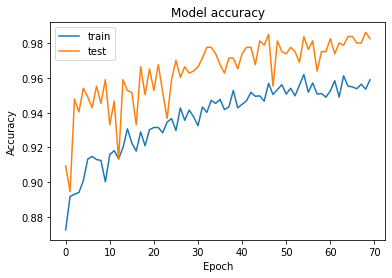

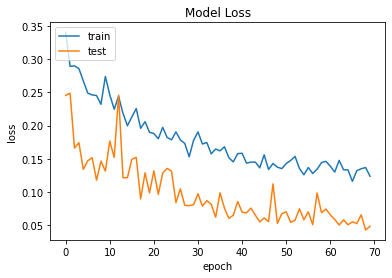

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
history.history['accuracy']

[0.8725314140319824,
 0.891767144203186,
 0.8930494785308838,
 0.8940753936767578,
 0.9007437825202942,
 0.9133111238479614,
 0.9148499369621277,
 0.9130546450614929,
 0.9125416874885559,
 0.9002308249473572,
 0.9158758521080017,
 0.9181841611862183,
 0.9135676026344299,
 0.919979453086853,
 0.9307515025138855,
 0.9225442409515381,
 0.9179276823997498,
 0.928956151008606,
 0.921005368232727,
 0.9302385449409485,
 0.9315208792686462,
 0.9315208792686462,
 0.928443193435669,
 0.9345986247062683,
 0.9366503953933716,
 0.9297255873680115,
 0.942805826663971,
 0.9356245398521423,
 0.9415234923362732,
 0.9376763105392456,
 0.9325467944145203,
 0.943318784236908,
 0.9402410984039307,
 0.9471659660339355,
 0.945370614528656,
 0.9476788640022278,
 0.9417799711227417,
 0.943318784236908,
 0.9528084397315979,
 0.942805826663971,
 0.944857656955719,
 0.946909487247467,
 0.9517825245857239,
 0.9494742155075073,
 0.9497306942939758,
 0.9466530084609985,
 0.9569120407104492,
 0.9505001306533813,
 0.9

In [35]:
max(history.history['accuracy'])

0.9620415568351746

In [36]:
history.history['val_accuracy']

[0.9094292521476746,
 0.8945409655570984,
 0.9478908181190491,
 0.940446674823761,
 0.9540942907333374,
 0.9491314888000488,
 0.9429280161857605,
 0.9553349614143372,
 0.9454094171524048,
 0.959057092666626,
 0.9330024719238281,
 0.9466501474380493,
 0.9131513833999634,
 0.959057092666626,
 0.9528536200523376,
 0.9516128897666931,
 0.9330024719238281,
 0.9665012359619141,
 0.9503722190856934,
 0.9652605652809143,
 0.9528536200523376,
 0.9677419066429138,
 0.9516128897666931,
 0.9367245435714722,
 0.959057092666626,
 0.9702233076095581,
 0.9602977633476257,
 0.9665012359619141,
 0.96277916431427,
 0.9640198349952698,
 0.9665012359619141,
 0.9714640378952026,
 0.977667510509491,
 0.977667510509491,
 0.9739454388618469,
 0.9677419066429138,
 0.96277916431427,
 0.9714640378952026,
 0.9714640378952026,
 0.9652605652809143,
 0.9739454388618469,
 0.977667510509491,
 0.977667510509491,
 0.9677419066429138,
 0.981389582157135,
 0.9789081811904907,
 0.985111653804779,
 0.9553349614143372,
 0.981

In [37]:
max(history.history['val_accuracy'])

0.9863523840904236